In [2]:
# import all stuff we will need
import numpy as np
import matplotlib.pyplot as plt

from call_put_bs import call_put_bs
from barrier_bs import barrier_bs
from gbm_d import gbm_d
from yf import yf

# 4.1 Functionality of barrier options

We distinguish two main types of (single) barrier options. For a open set $G\in\mathbb{R}^d$ and for $T>0$ define the random variable

\begin{equation}\label{eq:def_of_I}
I:=1_{\{T<\tau_G\}}:=\left\{\begin{array}{ll}1 & {\rm if}\;\;T< \tau_G \\ 0 & {\rm else}\end{array}\right.
\end{equation}

where 

\begin{equation*}
\tau_G:=\min\{t\geq 0\mid S_t\notin G\}
\end{equation*}

is the first exit time of the stochastic process $S_t$ from the domain $G$. According to the two values the random variable $I$ can take we distinguish two main types of barrier options. 

- An out-option only pays off if the underlying does <span style="color:red">not</span> reach the barrier before $T$; $I=1$. Otherwise the option becomes worthless.
- An in-option only pays off if the underlying reaches the barrier before $T$; $I=0$. Otherwise the option becomes worthless.


Out- or in options respectively can be further grouped in up-or down-options. 

- If $S_0<B$, the option is an up-option; with domain $G=]0,B[$
- If $S_0>B$, the option is a down-option; with domain $G=]B,\infty[$

To completely characterise a barrier option, we additionally need to specify the payoff function $g$ at maturity. For example, a down-and-out put pays off at maturity $g(S_T)=\max\{X-S_T,0\}$ if the underlying did not hit the barrier from above, $I=1$.

Do an example. Simulate two paths of a geometric Brownian motion 

$$S_t=S_0e^{(\mu-\sigma^2/2)t+\sigma W_t}$$

for $S_0=100$, $\mu=0$, $\sigma=0.3$ and $t\in [0,2]$ and check wether the paths hit the barrier $B=80$.

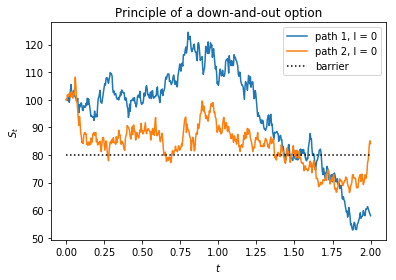

In [3]:
s0 = 100; mu = 0; sigma = 0.3; T = 2; B = 80; dt = 1/252;
S1,t = gbm_d([s0],[mu],[[sigma**2]],[],T,dt)
S2,t = gbm_d([s0],[mu],[[sigma**2]],[],T,dt)

plt.plot(t,S1); plt.plot(t,S2); plt.plot([0,T],[B,B],'k:');
plt.xlabel('$t$'); plt.ylabel('$S_t$');
plt.title('Principle of a down-and-out option')
plt.legend(('path 1, I = %i' %int(np.min(S1)>=B),'path 2, I = %i' %int(np.min(S2)>=B),'barrier'));

# 4.2 Pricing single barrier options

We consider exemplarily an out option. By the general principles of derivatives pricing discussed in chapter 3 the price of this option with payoff function $g$ is - under the assumption of time-continuous barrier monitoring - given by the expectation

\begin{equation*}
V(s,t)=e^{-r(T-t)}\mathbb{E}^{\mathbb{Q}}\big[g(S_T)1_{\{T<\tau_G\}}\mid S_t=s\big]
\end{equation*}

To evaluate this expectation we need to know explicitly the (risk neutral) joint probability density function $f_{\mathbb{Q}}$ of the two random variables $(S_T,\tau_G)$ given that $S_t=s$. Knowing $f_{\mathbb{Q}}$ we then would need to calculate the double integral

\begin{equation*}
\mathbb{E}^{\mathbb{Q}}\big[g(S_T)1_{\{T<\tau_G\}}\mid S_t=s\big]=\int_{0}^\infty\int_0^\infty g(x)1_{\{T<y\}}f_{\mathbb{Q}}(x,y)\textrm{d}x\textrm{d}y\;.
\end{equation*}

For arbitrary processes $S_t$ it is not possible to evaluate this double integral analytically. For example, we are not able to calculate the expectation in a local volatility model, such that we need some numerical approximation, for example a Monte Carlo procedure. However, Monte Carlo pricing of continuously monitored barrier options is not straight forward, and it is computationally better to solve (numerically) the corresponding pricing <span style="color:red">partial differential equation</span> (PDE) satisfied by the price $V=V(s,t)$ of the option. 

Here, we use the deep connection between probability theory and differential equations. This connection is the so-called Feynman-Kac theorem and states that conditional expectations (which derivative prices are) involving stochastic processes can be equivalently written as solutions of partial differential equations. The theorem is named after the famous american physicist Richard Feynman (1918--1988), Nobel price winner in physics, and the polish mathematician Mark Kac (1914--1984). For an out option with barrier $B$ and continuous barrier observation, the pricing PDE is

\begin{equation*}
\left\{\begin{array}{rcl}
\partial_tV+\frac{1}{2}\sigma^2(s,t)s^2\partial_{ss}V+(r-q)s\partial_sV-rV & = & 0 & {\rm in}\; G \times [0,T[\\
V(B,t) & = & 0 & {\rm in}\; [0,T[\\
V(s,T) & = & g(s) & {\rm in}\; G
\end{array}\right.
\end{equation*}


If we assume that the underlying follows a geometric Brownian motion, i.e., $\sigma(s,t)\equiv \sigma$ and that dividend payments are made continuously (with rate $q$) then the above expectation (or, equivalently, the corresponding PDE) can be calculated/solved analytically, i.e., there are pricing formulas available. For example, for a down-and-out put (where $g(x)=\max\{X-x,0\}$) with strike $X$ and barrier $B$ one finds

\begin{equation*}
V_{p,{\rm do}}(s,t) = V_c(s,t;X,X)-V_c(s,t;X,B)-\Big(\frac{s}{B}\Big)^{\alpha}\big(V_c(s,t;XY,XY)-V_c(s,t;XY,BY)\big)\;
\end{equation*}

whereas for a down-and-out call with $g(x)=\max\{x-X,0\}$ we have

\begin{equation*}
V_{c,{\rm do}}(s,t) = V_c(s,t;X,X)-\Big(\frac{s}{B}\Big)^{\alpha}V_c(s,t;XY,XY)\;.
\end{equation*}

Once the out-options are priced, the value of the corresponding in-options can be found by 

\begin{eqnarray*}
V_{p,{\rm di}}(s,t) & = & V_p(s,t)-V_{p,{\rm do}}(s,t)\\
V_{c,{\rm di}}(s,t) & = & V_c(s,t)-V_{c,{\rm do}}(s,t)\;.
\end{eqnarray*}

In the above formulas we use the following notation. We denote by 

\begin{equation*}
V_c(s,t;X,Z):=se^{-q(T-t)}N(d_1)-Xe^{-r(T-t)}N(d_2)\;,
\end{equation*}

with 

\begin{equation*}
d_1 = \frac{1}{\sigma\sqrt{T-t}}\bigg(\ln\frac{s}{Z}+\big(r-q+\frac{\sigma^2}{2}\big)(T-t)\bigg), \quad 
d_2 = d_1-\sigma\sqrt{T-t}\;,
\end{equation*}

and let $Y$ and $\alpha$, respectively, be given by

\begin{eqnarray*}
Y & := &\bigg(\frac{s}{B}\bigg)^2 \\
\alpha & := & -1-\frac{2(r-q)}{\sigma^2}\;.
\end{eqnarray*}

### Example 4.2

On September $26$, $2018$, we consider a down-and-out put on Nestle. The underlying has the following values: $s=S_0=80.80$ CHF, $\sigma=14.74\%$ and $q=3.30\%$ ($\sigma$ and $q$ are from Bloomberg). The parameters of the down-and-out put are: strike $X=84.84$ CHF, barrier $B=55.752$, maturity September $27$, $2021$. The continuously compounded risk free is $r=-0.329\%$.

The Python function <span style="color:orange">barrier_bs.py</span> gives the value of down-and-out and down-and-in call or put options.

In [2]:
help(barrier_bs)

Help on function barrier_bs in module barrier_bs:

barrier_bs(s, B, X, T, sigma, r, q)
    [Vpdo,Vpdi,Vcdo,Vcdi] = barrier_bs(s,B,X,T,sigma,r,q) gives the 
    Black-Scholes price V of a down-and-out put (pdo), down-and-in put (pdi), 
    down-and-out call (cdo) and down-and-in (cdi) call option with barrier B,
    strike X and maturity T. The actual price of the underlying is s, its
    vola is sigma. r and q are cc risk free and the cc dividend yield,
    respectively.



In [3]:
T = yf((26,9,2018),[(27,9,2021)])
V = barrier_bs(80.80,55.752,84.84,T[0],0.1474,-0.00329,0.033)
T[0], V[0]

(3.0027777777777778, 6.4554971129640695)

Do a plot of the graph of the function $s\mapsto V_{p,{\rm do}}(s,0)$ and compare it with the ordinary put (let $T=0.5$ for better illustration)

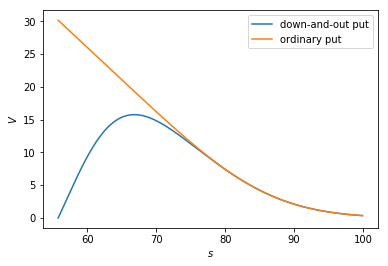

In [4]:
s = np.arange(55.752,100,0.1)
plt.plot(s,barrier_bs(s,55.752,84.84,0.5,0.1474,-0.00329,0.033)[0]);
plt.plot(s,call_put_bs(s=s,X=84.84,T=0.5,sigma=0.1474,q=0.033,r=-0.00329,omega=-1));
plt.xlabel('$s$'); plt.ylabel('$V$'); plt.legend(('down-and-out put','ordinary put'));

# 4.3 Exit probability

We calculate the probability that a stock $S_t$ with $s=S_0>B$ leaves the domain $G=]B,\infty[$ within a certain time. This is equivalent to the probability that the stock hits the barrier from above. If the underlying follows a geometric Brownian motion 

$$S_t=se^{(\mu-\sigma^2/2)t+\sigma W_t}$$ 

then probability $\mathbb{P}[\tau_G<t]$ that it hits the barrier before $t$ is given by

\begin{equation*}
p(s,t)=\bigg(\frac{B}{s}\bigg)^{\frac{2\mu}{\sigma^2}-1}N(d_+)+N(d_{-})\;.
\end{equation*}

Herewith, $d_{\pm}$ are given by

\begin{equation*}
d_\pm:=\frac{\ln\frac{B}{s}\pm (\mu-\sigma^2/2)t}{\sigma\sqrt{t}}\;.
\end{equation*}

We implement the formula for $p(s,t)$ below.

In [5]:
import scipy.stats as ss
def exit_prob(s,B,t,mu,sigma):
    a = 2*mu/sigma**2-1
    dp = (np.log(B/s)+(mu-sigma**2/2)*t)/(sigma*np.sqrt(t))
    dm = (np.log(B/s)-(mu-sigma**2/2)*t)/(sigma*np.sqrt(t))
    p = (B/s)**a*ss.norm.cdf(dp)+ss.norm.cdf(dm)
    
    return p

### Example 4.3

On September $26$, $2018$, we calculate the probability that Nestle from example 4.2 hits the barrier in the next $3$ years. To do so, we may estimate $\mu$ and $\sigma$ using historical data. A time series of daily closing prices of Nestle ranging from September $25$, $2015$ to September $25$, $2018$, yields $\mu=5.3\%$ and $\sigma=14.8\%$

In [6]:
exit_prob(80.8,55.752,3,0.053,0.148)

0.06703777530984827

Do a plot of of the graph $\frac{s}{B}\mapsto p(s,t)$ for $\mu=0$, $\sigma\in \{0.1,0.2,0.3\}$ and $t=0.5$. 

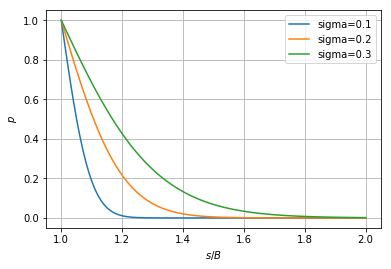

In [7]:
B = 1; s = np.arange(B,2*B+0.01,0.01);
plt.plot(s,exit_prob(s,B,0.5,0,0.1)); plt.plot(s,exit_prob(s,B,0.5,0,0.2)); plt.plot(s,exit_prob(s,B,0.5,0,0.3));
plt.xlabel('$s/B$'); plt.ylabel('$p$'); plt.legend(('sigma=0.1','sigma=0.2','sigma=0.3'))
plt.grid(b=True)